In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Lung Cancer.csv')

In [ ]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['treatment_duration'] = (df['end_treatment_date'] - df['diagnosis_date']).dt.days
df['diagnosis_year'] = df['diagnosis_date'].dt.year
df['bmi_cholesterol_interaction'] = df['bmi'] * df['cholesterol_level']
df['age_hypertension_interaction'] = df['age'] * df['hypertension']
display(df[['treatment_duration', 'diagnosis_year', 'bmi_cholesterol_interaction', 'age_hypertension_interaction']].head())


,treatment_duration,diagnosis_year,bmi_cholesterol_interaction,age_hypertension_interaction
0,523,2016,5850.6,0.0
1,424,2023,11536.0,50.0
2,370,2023,11792.0,65.0
3,443,2016,10363.0,51.0
4,406,2023,3506.6,0.0


In [ ]:
selected_columns = ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_duration', 'diagnosis_year', 'bmi_cholesterol_interaction', 'age_hypertension_interaction', 'survived']
numerical_and_engineered_df = df[selected_columns]



In [ ]:
# Check for missing values in the selected columns
missing_values_selected = numerical_and_engineered_df.isnull().sum()
print("Missing values in selected columns:")
print(missing_values_selected)

Missing values in selected columns:
id                              0
age                             0
bmi                             0
cholesterol_level               0
hypertension                    0
asthma                          0
cirrhosis                       0
other_cancer                    0
treatment_duration              0
diagnosis_year                  0
bmi_cholesterol_interaction     0
age_hypertension_interaction    0
survived                        0
dtype: int64


In [ ]:
correlation_matrix_engineered = numerical_and_engineered_df.corr()
display(correlation_matrix_engineered)

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_duration,diagnosis_year,bmi_cholesterol_interaction,age_hypertension_interaction,survived
id,1.000000,0.000142,-0.001144,-0.001507,-0.002296,0.000096,0.001167,-0.000872,-0.000420,-0.001072,-0.001524,-0.001997,0.000517
age,0.000142,1.000000,0.000915,0.001799,-0.001082,-0.000519,-0.000067,-0.000785,0.000246,-0.001575,0.001247,0.294932,0.001233
bmi,-0.001144,0.000915,1.000000,0.746905,0.001923,0.001662,0.000608,0.000771,-0.007400,0.001261,0.959995,0.002007,0.000007
cholesterol_level,-0.001507,0.001799,0.746905,1.000000,0.002049,0.001263,0.000467,-0.000185,-0.008703,0.001286,0.896018,0.002431,0.000157
hypertension,-0.002296,-0.001082,0.001923,0.002049,1.000000,0.108201,0.097139,0.073651,-0.010732,-0.000010,0.001946,0.939826,0.000059
asthma,0.000096,-0.000519,0.001662,0.001263,0.108201,1.000000,0.053147,0.039283,-0.002795,0.002135,0.001581,0.101870,-0.001809
cirrhosis,0.001167,-0.000067,0.000608,0.000467,0.097139,0.053147,1.000000,0.022671,-0.001821,-0.000882,0.000518,0.091363,0.001956
other_cancer,-0.000872,-0.000785,0.000771,-0.000185,0.073651,0.039283,0.022671,1.000000,-0.001021,-0.000990,0.000389,0.068793,-0.001972
treatment_duration,-0.000420,0.000246,-0.007400,-0.008703,-0.010732,-0.002795,-0.001821,-0.001021,1.000000,0.000271,-0.007899,-0.010078,-0.000691
diagnosis_year,-0.001072,-0.001575,0.001261,0.001286,-0.000010,0.002135,-0.000882,-0.000990,0.000271,1.000000,0.001493,-0.000426,0.000281


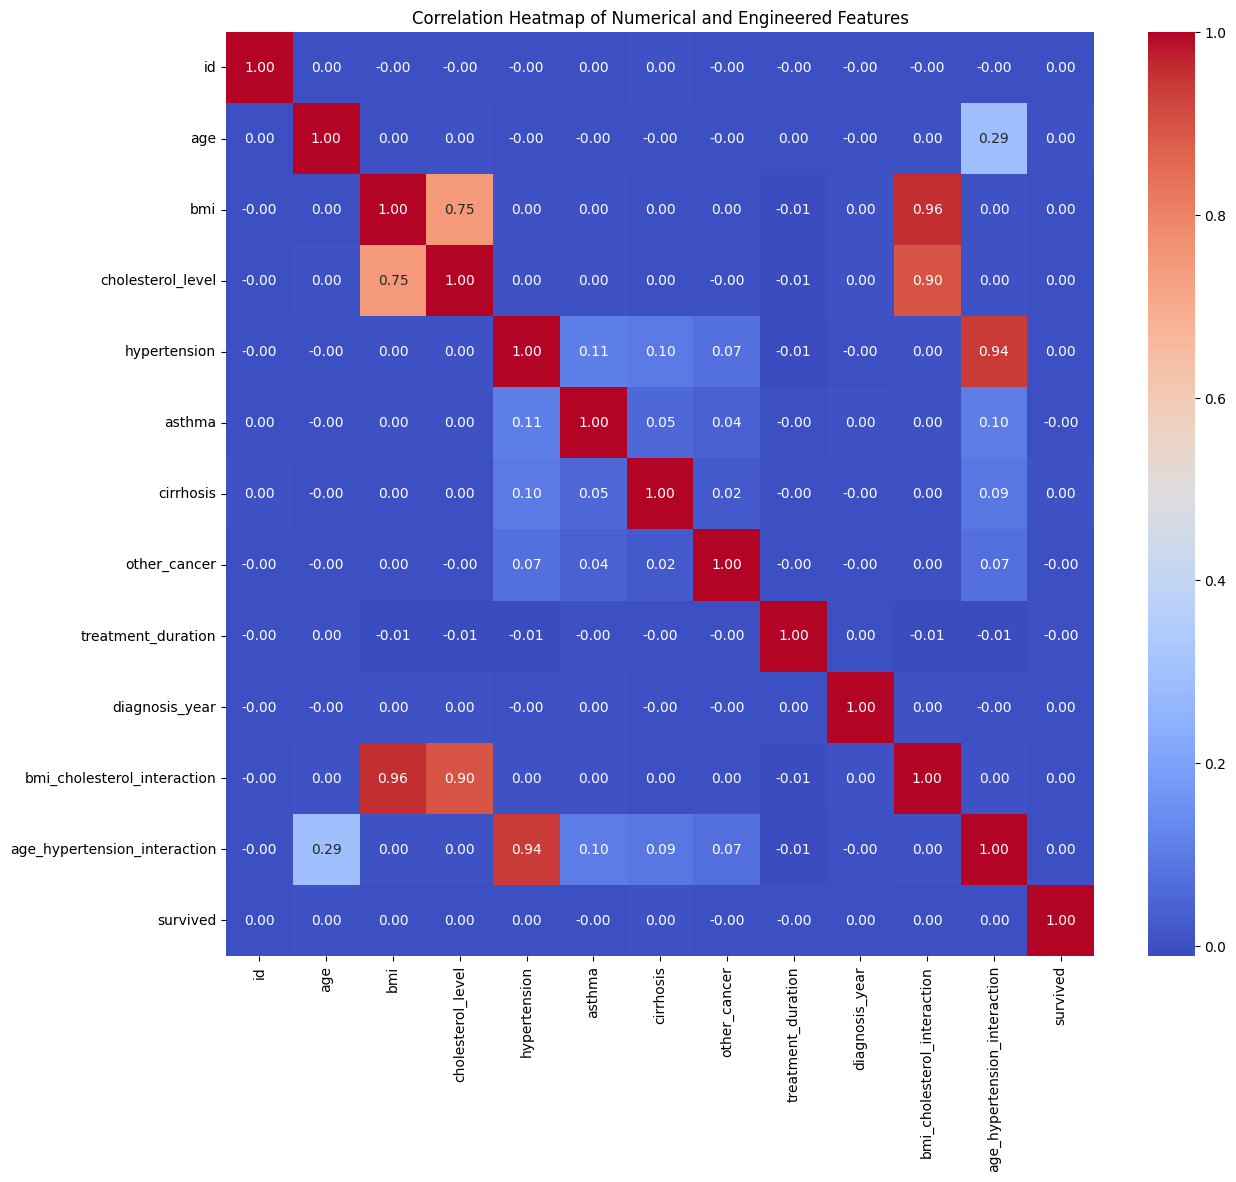

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_engineered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical and Engineered Features')
plt.show()

In [ ]:
print("Correlation of Engineered Features with 'survived':")
print(correlation_matrix_engineered[['treatment_duration', 'diagnosis_year', 'bmi_cholesterol_interaction', 'age_hypertension_interaction', 'survived']].loc['survived'])

Correlation of Engineered Features with 'survived':
treatment_duration             -0.000691
diagnosis_year                  0.000281
bmi_cholesterol_interaction     0.000083
age_hypertension_interaction    0.000481
survived                        1.000000
Name: survived, dtype: float64


In [ ]:
print("\nCorrelation of Original Numerical Features with 'survived':")
print(correlation_matrix[['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']].loc['survived'])



Correlation of Original Numerical Features with 'survived':


NameError: name 'correlation_matrix' is not defined